# Data Manipulation with Python

## What Is Pandas?
* Pandas is a Python library that primarily adds two new datatypes to Python: __`DataFrame`__ and __`Series`__.

- a __`Series`__ is a sequence of items, where each item has a unique label (called an __`index`__).
- a __`DataFrame`__ is a table of data. Each row has a unique label (the __`row index`__), and each column has a unique label (the __`column index`__).
- Note that each column in a __`DataFrame`__ can be considered a __`Series`__ (__`Series`__ index).
* Behind the scenes, these datatypes use the NumPy ("Numerical Python") library
* NumPy primarily adds the __`ndarray`__ (n-dimensional array) datatype to Pandas
* An __`ndarray`__ is similar to a Python list — it stores ordered data
* However, it differs in three respects:
  * Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer)
  * Elements are stored contiguously (immediately after each other) in memory for fast retrieval
  * The total size of an __`ndarray`__ is fixed

* Storing __`Series`__ and __`DataFrame`__ data in __`ndarray`__ makes Pandas faster and uses less memory than standard Python datatypes


## Let's import Pandas

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## While we're at it, we can do the equivalent operations (mostly) in PySpark

In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/30 21:21:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


<a id="reading-files"></a>
## Reading Files, Selecting Columns, and Summarizing

In [5]:
# using the read_csv method of pandas we read file 
users = pd.read_csv('./data/user.tbl', sep='|')

In [6]:
users_spark = spark.read.option("delimiter", "|").option("header", "true").csv("./data/user.tbl", inferSchema=True)

## Examine the users data

In [7]:
users # this will not display the entire DataFrame, but rather, first 5 and last 5 rows

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [8]:
users_spark

DataFrame[user_id: int, age: int, sex: string, occupation: string, zip_code: string]

In [9]:
type(users)

pandas.core.frame.DataFrame

In [10]:
type(users_spark)

pyspark.sql.dataframe.DataFrame

In [11]:
# how to get the size of the dataframe?
users.shape

(943, 5)

In [12]:
(users_spark.count(), len(users_spark.columns)) # note that .count() triggers a FULL scan of the data

(943, 5)

25/04/30 21:21:59 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [13]:
# if you have a HUGE dataset, you can estimate the size rather than counting the entire dataset
fraction = 0.01  # 1% sample
sample = users_spark.sample(withReplacement=False, fraction=fraction)
sample_count = sample.count()

estimated_total_rows = sample_count / fraction
print(f"Estimated total rows: {estimated_total_rows}")

Estimated total rows: 1100.0


In [7]:
users.head()          # Print the first five rows

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [14]:
users_spark.show(5)

+-------+---+---+----------+--------+
|user_id|age|sex|occupation|zip_code|
+-------+---+---+----------+--------+
|      1| 24|  M|technician|   85711|
|      2| 53|  F|     other|   94043|
|      3| 23|  M|    writer|   32067|
|      4| 24|  M|technician|   43537|
|      5| 33|  F|     other|   15213|
+-------+---+---+----------+--------+
only showing top 5 rows



In [15]:
users.head(10)          # er, make it 10

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [16]:
users.tail(5) # last 5 rows

,user_id,age,sex,occupation,zip_code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [17]:
 # The row index (aka "the row labels" — in this case integers)
users.index            

RangeIndex(start=0, stop=943, step=1)

In [ ]:
# no built-in concept of a row index because PySpark DataFrames are distributed and unordered

In [18]:
# Column names (which is "an index")
users.columns

Index(['user_id', 'age', 'sex', 'occupation', 'zip_code'], dtype='object')

In [19]:
users_spark.columns

['user_id', 'age', 'sex', 'occupation', 'zip_code']

In [21]:
# Datatypes of each column — each column is stored as an ndarray, which has a datatype
users.dtypes

user_id        int64
age            int64
sex           object
occupation    object
zip_code      object
dtype: object

In [22]:
users_spark.dtypes

[('user_id', 'int'),
 ('age', 'int'),
 ('sex', 'string'),
 ('occupation', 'string'),
 ('zip_code', 'string')]

In [23]:
# Number of rows and columns
users.shape

(943, 5)

In [24]:
users.shape[0]

943

In [25]:
# All values as a NumPy array
users.values

array([[1, 24, 'M', 'technician', '85711'],
       [2, 53, 'F', 'other', '94043'],
       [3, 23, 'M', 'writer', '32067'],
       ...,
       [941, 20, 'M', 'student', '97229'],
       [942, 48, 'F', 'librarian', '78209'],
       [943, 22, 'M', 'student', '77841']], shape=(943, 5), dtype=object)

In [15]:
type(users.values)

numpy.ndarray

In [26]:
# Concise summary (including memory usage) — useful to quickly see if nulls exist
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   sex         943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


## Select or index data
- a __`DataFrame`__ is structurally similar to a Python lists and dictionaries  
- in the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key

In [48]:
# Select a column — returns a Pandas Series (essentially an ndarray with an index)
users['sex']

0      M
1      F
2      M
3      M
4      F
      ..
938    F
939    M
940    M
941    F
942    M
Name: sex, Length: 943, dtype: object

In [27]:
users_spark['sex']

Column<'sex'>

In [28]:
# DataFrame columns are Pandas Series
type(users['sex'])

pandas.core.series.Series

In [29]:
type(users_spark['sex'])

pyspark.sql.column.Column

## Summarize (describe) the data
- Pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding

In [30]:
# Describe all numeric columns.
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [31]:
# Describe all columns, including non-numeric.
users.describe(include='all')

,user_id,age,sex,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


In [23]:
users_spark.describe().show()

25/04/30 21:08:09 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-----------------+-----------------+----+-------------+------------------+
|summary|          user_id|              age| sex|   occupation|          zip_code|
+-------+-----------------+-----------------+----+-------------+------------------+
|  count|              943|              943| 943|          943|               943|
|   mean|            472.0|34.05196182396607|NULL|         NULL| 50868.78810810811|
| stddev|272.3649512449549|12.19273973305903|NULL|         NULL|30891.373254138176|
|    min|                1|                7|   F|administrator|             00000|
|    max|              943|               73|   M|       writer|             Y1A6B|
+-------+-----------------+-----------------+----+-------------+------------------+



In [36]:
# Describe a single column — recall that "users.sex" refers to a Series.
users.sex.describe()

count     943
unique      2
top         M
freq      670
Name: sex, dtype: object

In [32]:
users_spark.describe('sex').show()

+-------+----+
|summary| sex|
+-------+----+
|  count| 943|
|   mean|NULL|
| stddev|NULL|
|    min|   F|
|    max|   M|
+-------+----+



In [21]:
# Calculate the mean of the ages.
users.age.mean()

np.float64(34.05196182396607)

In [30]:
from pyspark.sql.functions import mean

users_spark.select(mean('age')).show()

+-----------------+
|         avg(age)|
+-----------------+
|34.05196182396607|
+-----------------+



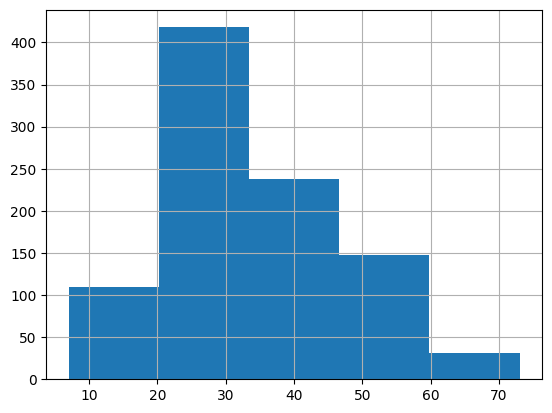

In [24]:
# Draw a histogram of a column (the distribution of ages).
users.age.hist(bins=5);

## Count the number of occurrences of each value

In [25]:
users.sex.value_counts()  
# Most useful for categorical variables

sex
M    670
F    273
Name: count, dtype: int64

In [31]:
users_spark.groupBy('sex').count().show()

+---+-----+
|sex|count|
+---+-----+
|  F|  273|
|  M|  670|
+---+-----+



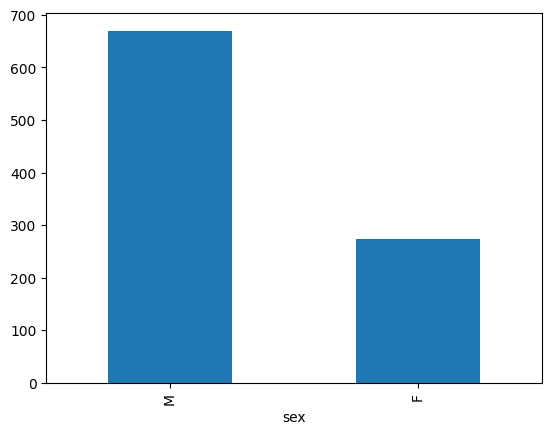

In [52]:
users.sex.value_counts().plot(kind='bar');   # Quick plot by category

In [51]:
# How many of each zip codes do we have? 
users.zip_code.value_counts()

zip_code
55414    9
55105    6
55337    5
10003    5
20009    5
        ..
24060    1
55413    1
19149    1
02176    1
77841    1
Name: count, Length: 795, dtype: int64

In [32]:
users_spark.groupBy('zip_code').count().show()

+--------+-----+
|zip_code|count|
+--------+-----+
|   46538|    1|
|   06518|    1|
|   30002|    1|
|   43085|    1|
|   N4T1A|    1|
|   29210|    1|
|   10309|    1|
|   92374|    1|
|   55443|    1|
|   29301|    1|
|   55412|    1|
|   95662|    1|
|   49036|    1|
|   20723|    1|
|   63021|    1|
|   85251|    1|
|   97330|    1|
|   52246|    1|
|   63129|    1|
|   32301|    2|
+--------+-----+
only showing top 20 rows



In [57]:
# Can also be used with numeric variables
#   Try .sort_index() to sort by indices or .sort_values() to sort by counts.
users.age.value_counts()

age
30    39
25    38
22    37
28    36
27    35
      ..
7      1
66     1
11     1
10     1
73     1
Name: count, Length: 61, dtype: int64

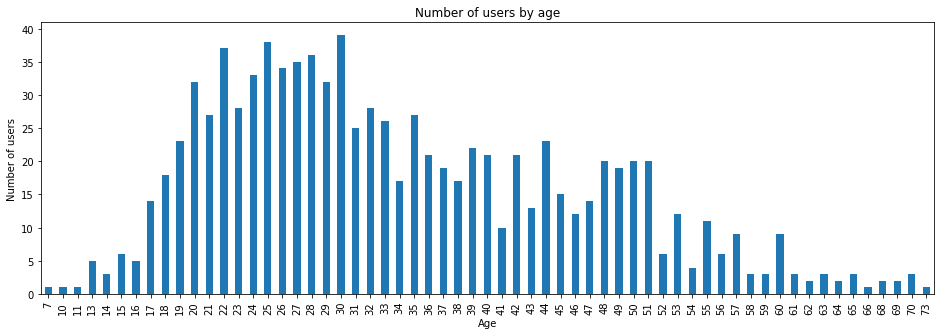

In [54]:
users.age.value_counts().sort_index().plot(kind='bar', figsize=(16, 5));     # Bigger plot by increasing age
plt.xlabel('Age');
plt.ylabel('Number of users');
plt.title('Number of users by age');

# Exercise 1 


In [48]:
# Read drinks.csv into a DataFrame called "drinks".
import pandas as pd
drinks = pd.read_csv('./data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [49]:
drinks.shape

(193, 6)

In [ ]:
# Print the head and the tail

In [65]:
# Examine the default index, datatypes, and shape

In [68]:
# Print the beer_servings Series

In [24]:
# Calculate the average beer_servings for the entire data set

In [69]:
# Count the number of occurrences of each "continent" value and see if it looks correct

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

<a id="filtering-and-sorting"></a>
## Filtering and Sorting
* We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

## Logical filtering: Only show users with age < 20

In [34]:
# Create a Series of Booleans…
# In Pandas, this comparison is performed element-wise on each row of data.
young_bool = users.age < 20
young_bool

0      False
1      False
2      False
3      False
4      False
       ...  
938    False
939    False
940    False
941    False
942    False
Name: age, Length: 943, dtype: bool

In [36]:
# …and use that Series to filter rows.
# In Pandas, indexing a DataFrame by a Series of Booleans only selects rows that are True in the Boolean.
users[young_bool]
# users[users.age==14]

,user_id,age,sex,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
...,...,...,...,...,...
871,872,19,F,student,74078
879,880,13,M,student,83702
886,887,14,F,student,27249
903,904,17,F,student,61073


In [37]:
users_spark.where(users_spark.age < 20).show()

+-------+---+---+-------------+--------+
|user_id|age|sex|   occupation|zip_code|
+-------+---+---+-------------+--------+
|     30|  7|  M|      student|   55436|
|     36| 19|  F|      student|   93117|
|     52| 18|  F|      student|   55105|
|     57| 16|  M|         none|   84010|
|     67| 17|  M|      student|   60402|
|     68| 19|  M|      student|   22904|
|    101| 15|  M|      student|   05146|
|    110| 19|  M|      student|   77840|
|    142| 13|  M|        other|   48118|
|    179| 15|  M|entertainment|   20755|
|    206| 14|  F|      student|   53115|
|    221| 19|  M|      student|   20685|
|    223| 19|  F|      student|   47906|
|    246| 19|  M|      student|   28734|
|    257| 17|  M|      student|   77005|
|    258| 19|  F|      student|   77801|
|    262| 19|  F|      student|   78264|
|    270| 18|  F|      student|   63119|
|    281| 15|  F|      student|   06059|
|    289| 11|  M|         none|   94619|
+-------+---+---+-------------+--------+
only showing top

In [38]:
users['boolage'] = users.age < 30
users.head(5)

,user_id,age,sex,occupation,zip_code,boolage
0,1,24,M,technician,85711,True
1,2,53,F,other,94043,False
2,3,23,M,writer,32067,True
3,4,24,M,technician,43537,True
4,5,33,F,other,15213,False


In [73]:
# Or, combine into a single step
users[users.age < 20]

,user_id,age,sex,occupation,zip_code,boolage
29,30,7,M,student,55436,True
35,36,19,F,student,93117,True
51,52,18,F,student,55105,True
56,57,16,M,none,84010,True
66,67,17,M,student,60402,True
...,...,...,...,...,...,...
871,872,19,F,student,74078,True
879,880,13,M,student,83702,True
886,887,14,F,student,27249,True
903,904,17,F,student,61073,True


In [33]:
users.columns

Index(['user_id', 'age', 'sex', 'occupation', 'zip_code'], dtype='object')

In [34]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [35]:
users_under20 = users[users.age < 20]   # To resolve this warning, copy the `DataFrame` using `.copy()`
users_under20

,user_id,age,sex,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
...,...,...,...,...,...
871,872,19,F,student,74078
879,880,13,M,student,83702
886,887,14,F,student,27249
903,904,17,F,student,61073


In [36]:
# Select one column from the filtered results.
users[users.age < 20].occupation

29      student
35      student
51      student
56         none
66      student
         ...   
871     student
879     student
886     student
903     student
924    salesman
Name: occupation, Length: 77, dtype: object

In [37]:
# value_counts of resulting Series
users[users.age < 20].occupation.value_counts()

occupation
student          64
other             4
none              3
entertainment     2
writer            2
artist            1
salesman          1
Name: count, dtype: int64

## Logical filtering with multiple conditions

In [38]:
# Ampersand for `AND` condition. (This is a "bitwise" `AND`.)
# Important: You MUST put parentheses around each expression because `&` has a higher precedence than `<`.
users[(users.age < 20) & (users.sex == 'M')]

,user_id,age,sex,occupation,zip_code
29,30,7,M,student,55436
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
109,110,19,M,student,77840
141,142,13,M,other,48118
178,179,15,M,entertainment,20755
220,221,19,M,student,20685
245,246,19,M,student,28734


In [39]:
# Pipe for `OR` condition. (This is a "bitwise" `OR`.)
# Important: You MUST put parentheses around each expression because `|` has a higher precedence than `<`.
users[(users.age < 20) | (users.age > 60)]

,user_id,age,sex,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
...,...,...,...,...,...
879,880,13,M,student,83702
886,887,14,F,student,27249
903,904,17,F,student,61073
924,925,18,F,salesman,49036


In [41]:
# Preferred alternative to multiple `OR` conditions

#users[(users['occupation'] == 'doctor') | (users['occupation'] == 'lawyer')]
users[users.occupation.isin(['doctor', 'lawyer'])]

,user_id,age,sex,occupation,zip_code
9,10,53,M,lawyer,90703
124,125,30,M,lawyer,22202
125,126,28,F,lawyer,20015
137,138,46,M,doctor,53211
160,161,50,M,lawyer,55104
204,205,47,M,lawyer,06371
250,251,28,M,doctor,85032
298,299,29,M,doctor,63108
338,339,35,M,lawyer,37901
364,365,29,M,lawyer,20009


## Sorting

In [42]:
# Sort a Series
users.age.sort_values()

29      7
470    10
288    11
879    13
608    13
       ..
584    69
766    70
802    70
859    70
480    73
Name: age, Length: 943, dtype: int64

In [43]:
# Sort a DataFrame by a single column
users.sort_values('age')

,user_id,age,sex,occupation,zip_code
29,30,7,M,student,55436
470,471,10,M,student,77459
288,289,11,M,none,94619
879,880,13,M,student,83702
608,609,13,F,student,55106
...,...,...,...,...,...
584,585,69,M,librarian,98501
766,767,70,M,engineer,00000
802,803,70,M,administrator,78212
859,860,70,F,retired,48322


In [44]:
# Use descending order instead
users.sort_values('age', ascending=False)

,user_id,age,sex,occupation,zip_code
480,481,73,M,retired,37771
802,803,70,M,administrator,78212
766,767,70,M,engineer,00000
859,860,70,F,retired,48322
584,585,69,M,librarian,98501
...,...,...,...,...,...
879,880,13,M,student,83702
608,609,13,F,student,55106
288,289,11,M,none,94619
470,471,10,M,student,77459


In [45]:
# Sort by multiple columns
users.sort_values(['occupation', 'age'])

,user_id,age,sex,occupation,zip_code
117,118,21,M,administrator,90210
179,180,22,F,administrator,60202
281,282,22,M,administrator,20057
316,317,22,M,administrator,13210
438,439,23,F,administrator,20817
...,...,...,...,...,...
547,548,51,M,writer,95468
369,370,52,M,writer,08534
391,392,52,M,writer,59801
557,558,56,F,writer,63132


<a id="exercise-two"></a>
## Exercise 2

<img src="./images/hands_on.jpg" width="100" height="100" align="right"/>

Use the __`drinks.csv`__ or the __`drinks DataFrame`__ from earlier to complete the following

In [50]:
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


In [ ]:
# Filter DataFrame to only include European countries

In [ ]:
# Filter DataFrame to only include European countries with wine_servings > 300

In [ ]:
# Calculate the average beer_servings for all of Europe

In [ ]:
# Determine which 10 countries have the highest total_litres_of_pure_alcohol.


<a id="columns"></a>
## Renaming, Adding, and Removing Columns

In [51]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [52]:
# Rename one or more columns in a single output using value mapping.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine','spirit_servings':'spirit'})

,country,beer,spirit,wine,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [53]:
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


In [54]:
# Rename one or more columns in the original DataFrame.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'
                       ,'spirit_servings':'spirit','total_litres_of_pure_alcohol':'liters'}, inplace=True)

In [55]:
drinks.head(2)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


## Easy Column Operations
- Rather than having to reference indexes and create for loops to do column-wise operations, Pandas is smart and knows that when we add columns together we want to add the values in each row together

In [63]:
# Add a new column as a function of existing columns
drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine
drinks['mL'] = drinks.liters * 1000
drinks.head()

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


## Removing Columns

In [64]:
# Drop multiple columns.
drinks.drop(['mL', 'servings'], axis=1)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [65]:
drinks.head(3)

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0


In [66]:
# Drop on the original DataFrame rather than returning a new one
drinks.drop(['mL', 'servings'], axis=1, inplace=True)

In [60]:
drinks.head(3)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


<a id="missing-values"></a>
## Handling Missing Values
* Sometimes, values will be missing from the source data or as a byproduct of manipulations
* It's very important to detect missing data, because missing data can:
  - Make the entire row ineligible to be training data for a model
  - Hint at data-collection errors
  - Indicate improper conversion or manipulation
  - Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

For example, a **.csv** file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```

When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

* In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`
* So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the **.csv** file above:
  - For the second row: `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row

In [67]:
# Missing values are usually excluded in calculations by default.
drinks.continent.value_counts()              # Excludes missing values in the calculation

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [68]:
# Includes missing values
drinks.continent.value_counts(dropna=False)

continent
AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: count, dtype: int64

In [69]:
# Count the missing values — sum() works because True is 1 and False is 0
drinks.continent.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: continent, Length: 193, dtype: bool

In [70]:
# Find missing values in a Series.
# True if missing, False if not missing
drinks.continent.isnull().sum()

np.int64(23)

In [72]:
# Only show rows where continent is not missing
drinks[drinks.continent.notnull()]
#drinks[drinks.continent.isnull()]

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


## Find missing values in a __`DataFrame`__

country       0
beer          0
spirit        0
wine          0
liters        0
continent    23
dtype: int64


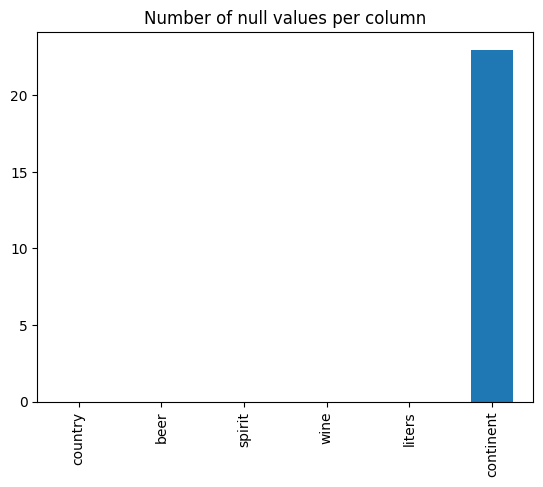

In [73]:
# Count the missing values in each column — remember by default, axis=0
print((drinks.isnull().sum()))

drinks.isnull().sum().plot(kind='bar');         # visually
plt.title('Number of null values per column');

## Dropping Missing Values

In [74]:
drinks.shape

(193, 6)

In [75]:
# Drop a row if ANY values are missing from any column — can be dangerous!
drinks.dropna()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [76]:
# Drop a row only if ALL values are missing
drinks.dropna(how='all')

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


## Filling Missing Values
- You may have noticed that the continent North America (NA) does not appear in the `continent` column
- Pandas read in the original data and saw "NA", thought it was a missing value, and converted it to a `NaN`, missing value

In [77]:
# Fill in missing values with "NA" — this is dangerous to do without manually verifying them!
drinks.continent.fillna(value='NA')

0      AS
1      EU
2      AF
3      EU
4      AF
       ..
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 193, dtype: object

In [80]:
# Modifies "drinks" in-place
drinks.continent = drinks.continent.fillna(value='NA')

<a id="exercise-three"></a>
## Exercise 3

In [83]:
# Read ufo.csv into a DataFrame called "ufo"
ufo = pd.read_csv('./data/ufo.csv')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [80]:
# Check the shape of the DataFrame
ufo.shape

(80543, 5)

In [ ]:
# What are the three most common colors reported?


In [ ]:
# Rename any columns with spaces so that they don't contain spaces


In [ ]:
# For reports in VA, what's the most common city?


In [ ]:
# Print a DataFrame containing only reports from Arlington, VA


In [ ]:
# Count the number of missing values in each column


In [84]:
# How many rows remain if you drop all rows with any missing values?
print('the original size:', ufo.shape[0])
ufo.dropna().shape[0]

the original size: 80543


15509

<a id="split-apply-combine"></a>
## Split-Apply-Combine

Split-apply-combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the `mean()` function to find the average beer consumption.
- **Combine:** We now combine the continent names with the `mean()`s to produce a summary of our findings.

In [85]:
drinks.head(3)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


In [88]:
# For each continent, calculate the mean beer servings
drinks.groupby('continent').beer.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer, dtype: float64

In [89]:
# For each continent, calculate the mean of all numeric columns.
drinks.groupby('continent').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [90]:
# For each continent, describe beer servings.
drinks.groupby('continent').beer.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
AS,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
EU,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
NA,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
OC,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
SA,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [91]:
# For each continent, describe all numeric columns.
drinks.groupby('continent').describe()

beer                                                             \
          count        mean        std   min     25%    50%     75%    max   
continent                                                                    
AF         53.0   61.471698  80.557816   0.0   15.00   32.0   76.00  376.0   
AS         44.0   37.045455  49.469725   0.0    4.25   17.5   60.50  247.0   
EU         45.0  193.777778  99.631569   0.0  127.00  219.0  270.00  361.0   
NA         23.0  145.434783  79.621163   1.0   80.00  143.0  198.00  285.0   
OC         16.0   89.687500  96.641412   0.0   21.00   52.5  125.75  306.0   
SA         12.0  175.083333  65.242845  93.0  129.50  162.5  198.00  333.0   

          spirit              ...    wine        liters                      \
           count        mean  ...     75%    max  count      mean       std   
continent                     ...                                             
AF          53.0   16.339623  ...   13.00  233.0   53.0  3.007547  2.647557   
AS          44.0   60.840909  ...    8.00  123.0   44.0  2.170455  2.770239   
EU          45.0  132.555556  ...  195.00  370.0   45.0  8.617778  3.358455   
NA          23.0  165.739130  ...   34.00  100.0   23.0  5.995652  2.409353   
OC          16.0   58.437500  ...   23.25  212.0   16.0  3.381250  3.345688   
SA          12.0  114.750000  ...   98.50  221.0   12.0  6.308333  1.531166   

                                           
           min   25%    50%     75%   max  
continent                                  
AF         0.0  0.70   2.30   4.700   9.1  
AS         0.0  0.10   1.20   2.425  11.5  
EU         0.0  6.60  10.00  10.900  14.4  
NA         2.2  4.30   6.30   7.000  11.9  
OC         0.0  1.00   1.75   6.150  10.4  
SA         3.8  5.25   6.85   7.375   8.3  

[6 rows x 32 columns]

In [92]:
# For each continent, count the number of rows.
print((drinks.continent.value_counts()))   # should be the same

continent
AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: count, dtype: int64


<a id="exercise-four"></a>
## Exercise 4 : Homework

Use the "users" `DataFrame` or "users" file in the Data folder to complete the following.

In [26]:
users.head(2)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043


In [ ]:
# For each occupation in "users", count the number of occurrences


In [ ]:
# For each occupation, calculate the mean age


In [ ]:
# For each occupation, calculate the minimum and maximum ages


In [ ]:
# For each combination of occupation and gender, calculate the mean age


<a id="multiple-columns"></a>
## Selecting Multiple Columns and Filtering Rows

In [94]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [95]:
# Or, combine into a single step (this is a Python list inside of the Python index operator!).
ufo[['City', 'State']].head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


## Use `loc` to select columns by name

In [96]:
# "loc" locates the values from the first parameter (colon means "all rows"), and the column "City".
ufo.loc[:, 'City'] 

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
80538                  Neligh
80539            Uhrichsville
80540                  Tucson
80541             Orland park
80542                Loughman
Name: City, Length: 80543, dtype: object

In [98]:
# Select two columns.
ufo.loc[:, ['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
80538,Neligh,NE
80539,Uhrichsville,OH
80540,Tucson,AZ
80541,Orland park,IL


In [99]:
# Select a range of columns — unlike Python ranges, Pandas index ranges INCLUDE the final column in the range.
ufo.loc[:, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE
80539,Uhrichsville,NaN,LIGHT,OH
80540,Tucson,RED BLUE,NaN,AZ
80541,Orland park,RED,LIGHT,IL


In [100]:
# "loc" can also filter rows by "name" (the index)
# Row 0, all columns
ufo.loc[0, :]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [101]:
# Rows 0/1/2, all columns
ufo.loc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [102]:
# Rows 0/1/2, range of columns
ufo.loc[0:2, 'City':'State'] 

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


<a id="other-features"></a>
## OPTIONAL: Other Commonly Used Features

In [36]:
# Apply an arbitrary function to each value of a Pandas column, storing the result in a new column.
users['under30'] = users.age.apply(lambda age: age < 30)
users

,user_id,age,sex,occupation,zip_code,under30
0,1,24,M,technician,85711,True
1,2,53,F,other,94043,False
2,3,23,M,writer,32067,True
3,4,24,M,technician,43537,True
4,5,33,F,other,15213,False
...,...,...,...,...,...,...
938,939,26,F,student,33319,True
939,940,32,M,administrator,02215,False
940,941,20,M,student,97229,True
941,942,48,F,librarian,78209,False


In [39]:
# Apply an arbitrary function to each row of a DataFrame, storing the result in a new column.
#  (Remember that, by default, axis=0. Since we want to go row by row, we set axis=1.)
users['under30male'] = users.apply(lambda row: row.age < 30 and row.sex == 'M', axis=1)
users

,user_id,age,sex,occupation,zip_code,under30,under30male
0,1,24,M,technician,85711,True,True
1,2,53,F,other,94043,False,False
2,3,23,M,writer,32067,True,True
3,4,24,M,technician,43537,True,True
4,5,33,F,other,15213,False,False
...,...,...,...,...,...,...,...
938,939,26,F,student,33319,True,False
939,940,32,M,administrator,02215,False,False
940,941,20,M,student,97229,True,True
941,942,48,F,librarian,78209,False,False


In [104]:
# Map existing values to a different set of values.
users['is_male'] = users.sex.map({'F':0, 'M':1})
users

,user_id,age,sex,occupation,zip_code,is_male
0,1,24,M,technician,85711,1
1,2,53,F,other,94043,0
2,3,23,M,writer,32067,1
3,4,24,M,technician,43537,1
4,5,33,F,other,15213,0
...,...,...,...,...,...,...
938,939,26,F,student,33319,0
939,940,32,M,administrator,02215,1
940,941,20,M,student,97229,1
941,942,48,F,librarian,78209,0


In [105]:
# Replace all instances of a value in a column (must match entire value)
ufo.State = ufo.State.replace('Fl', 'FL')

In [106]:
# String methods are accessed via "str".
ufo.State.str.upper() # converts to upper case

0        False
1        False
2        False
3        False
4        False
         ...  
80538    False
80539    False
80540     True
80541     True
80542    False
Name: Colors Reported, Length: 80543, dtype: object